<a href="https://colab.research.google.com/github/Marin-kh/price-prediction/blob/main/property_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install basemap
!pip install osmnx
!pip install xgboost
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine =

In [2]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from scipy.stats import zscore
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
import re
import requests
import xml.etree.ElementTree as ET
import random

In [175]:
drive.mount('/content/drive')
subpath ='/content/drive/My Drive/price-prediction'
df = pd.read_csv(f'{subpath}/delta_data/2024_Tehran_House_Price.csv')
df2 = pd.read_excel(f'{subpath}/delta_data/2022_Tehran_House_Price.xlsx')
df_region = pd.read_excel(f'{subpath}/delta_data/regions_updated.xlsx')
df_net = pd.read_csv(f'{subpath}/delta_data/Regions_delta_net.csv')
df_net3 = pd.read_csv(f'{subpath}/delta_data/Soleimani3.csv')
df_pop = pd.read_excel(f'{subpath}/other_sources_data/Population_Regions.xlsx')
pd.set_option('display.float_format', '{:.10f}'.format)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount('/content/drive')
subpath ='/content/drive/My Drive/price-prediction'
df = pd.read_csv('/content/drive/My Drive/2024_Tehran_House_Price.csv')
df_region = pd.read_csv('/content/drive/My Drive/regions_updated_new.csv')
df_net = pd.read_csv('/content/drive/My Drive/Regions_delta_net.csv')
df_net3 = pd.read_csv('/content/drive/My Drive/Soleimani3.csv')
df_pop = pd.read_excel('/content/drive/My Drive/Population_Regions.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
df_region

,id,link,lat,long,name,district
0,1,region-1-darband,35.8135171000,51.4294820000,دربند,1
1,2,region-1-niavaran,35.8160561000,51.4709472000,نیاوران,1
2,3,region-1-jamshidiyeh-jamaran,35.8139842000,51.4614174000,جمشیدیه-جماران,1
3,4,region-1-zafaraniyeh,35.8076813000,51.4163789000,زعفرانیه,1
4,5,region-1-mahmoodiyeh,35.7964156000,51.4126953000,محمودیه,1
...,...,...,...,...,...,...
474,475,region-1-farmanieh,35.8052576300,51.4548398000,فرمانیه,1
475,476,region-1-kamranieh,35.8022388600,51.4615550200,کامرانیه,1
476,477,region-1-qeytarieh,35.7903050500,51.4449767600,قیطریه,1
477,479,my-neighbour,35.5881282000,51.4473684000,محله ما,20


In [151]:
def extract_numbers(region):
    numbers = re.findall(r'\d+', region)
    if len(numbers)>1:
      return numbers[0]+'_'+numbers[1]
    elif len(numbers)==0:
      return '-'
    else:
      return numbers[0]

In [177]:
df_pop['Regions'] = df_pop['Regions'].apply(extract_numbers)
df_pop

,Regions,Population,Family Num,Density
0,1,493889,169259,11
1,2,692579,236992,15
2,3,330004,118801,11
3,4,917261,303730,15
4,5,856565,291665,16
5,6,250753,84896,12
6,7,312002,115880,20
7,8,425044,148535,32
8,9,174115,57648,9
9,10,326885,117325,40


In [176]:
df = pd.concat([df, df2], ignore_index=True)

In [178]:
# df_region = df_region.where(df_region['link']!='-').dropna()

df['Age'] = df['Age'].astype('int')
df['Price'] = (df['Price']/10).astype('int')
df['Meter'] = df['Meter'].astype('int')
df['Loan'] = df['Loan'].astype('int')
df['Parking'] = df['Parking'].astype('int')
df['Elevator'] = df['Elevator'].astype('int')
df['WareHouse'] = df['WareHouse'].astype('int')
df['Rooms'] = df['Rooms'].astype('int')
df['Floor'] = df['Floor'].astype('int')
df['validDate'] = pd.to_datetime(df['validDate'])

df['DaysSinceRegistration'] = (datetime.now() - df['validDate']).dt.days.astype('int')
today = datetime.today()
df['MonthSinceRegistration'] = (today.year - df['validDate'].dt.year) * 12 + (today.month - df['validDate'].dt.month)


decay_rate= 0.0045
df['weight'] = np.exp(-decay_rate * df['DaysSinceRegistration'])
df['D_daysince'] = df['DaysSinceRegistration'] * df['weight']
df['D_daysince'] = df['D_daysince'].astype('float')
decay_rate= 0.004
df['weight'] = np.exp(-decay_rate * df['DaysSinceRegistration'])
df['D_daysince2'] = df['DaysSinceRegistration'] * df['weight']
df['D_daysince2'] = df['D_daysince2'].astype('float')
decay_rate= 0.0035
df['weight'] = np.exp(-decay_rate * df['DaysSinceRegistration'])
df['D_daysince3'] = df['DaysSinceRegistration'] * df['weight']
df['D_daysince3'] = df['D_daysince3'].astype('float')

df

,Category,PropertyTypes,Title,Address,Latitude,Longitude,Age,Price,Meter,Loan,...,Floor,validDate,City,Region,DaysSinceRegistration,MonthSinceRegistration,weight,D_daysince,D_daysince2,D_daysince3
0,خرید-فروش,آپارتمان,NaN,توحیدها ...,0.0000000000,0.0000000000,0,28500000000,140,1,...,5,2024-01-02 16:14:12.453,تهران منطقه 2,شهرک غرب,438,14,0.2158870338,61.0210514500,75.9609133814,94.5585207829
1,خرید-فروش,آپارتمان,خرید / آپارتمان,شیخ بهایی شمالی ...,35.7659150000,51.3948940000,0,29000000000,114,0,...,4,2024-11-04 15:18:28.580,تهران منطقه 3,شیخ بهایی,131,4,0.6322312815,72.6531918160,77.5712852446,82.8222978797
2,خرید-فروش,آپارتمان,NaN,فاز 4 ...,0.0000000000,0.0000000000,10,75000000000,300,0,...,2,2024-01-01 18:44:36.453,تهران منطقه 2,شهرک غرب,439,14,0.2151327499,60.8857655799,75.8304110272,94.4432772059
3,خرید-فروش,آپارتمان,NaN,صرافها ...,0.0000000000,0.0000000000,8,19200000000,120,0,...,2,2024-01-01 18:45:21.210,تهران منطقه 2,سعادت آباد,439,14,0.2151327499,60.8857655799,75.8304110272,94.4432772059
4,خرید-فروش,آپارتمان,NaN,سعادت آباد ...,0.0000000000,0.0000000000,20,18900000000,135,0,...,2,2024-01-01 18:44:07.657,تهران منطقه 2,سعادت آباد,439,14,0.2151327499,60.8857655799,75.8304110272,94.4432772059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253588,خرید-فروش,آپارتمان,NaN,نواب ...,35.7001570000,51.3780780000,16,1350000000,67,0,...,1,2022-05-09 11:01:19.080,تهران منطقه 9 و 10,نواب,1042,34,0.0260692192,9.5821042896,16.1334897832,27.1641264504
253589,خرید-فروش,آپارتمان,۷۲متر۲خواب/دلباز/فول/تاپ لوکیشن,بالای جلال ...,0.0000000000,0.0000000000,17,7300000000,72,0,...,4,2022-09-01 11:40:56.547,تهران منطقه 6,امیر آباد,927,30,0.0389880535,14.3027748739,22.7360908126,36.1419256050
253590,خرید-فروش,آپارتمان,✅خوش نقشه نقلی ✅فول امکانات,نرسیده غریب ...,0.0000000000,0.0000000000,12,4000000000,40,0,...,4,2022-09-19 19:13:54.973,تهران منطقه 6,نصرت,908,30,0.0416689097,15.2601427236,24.0285901737,37.8353699696
253591,خرید-فروش,آپارتمان,فروش ساختمان سند اداری به قیمت مسکونی,نظری ...,35.7737730000,51.2867480000,8,33500000000,428,0,...,3,2022-12-25 15:24:54.543,تهران منطقه 5,شهران شمالی,811,27,0.0585133702,21.0893474776,31.6351250065,47.4543432526


In [180]:
df = df.drop(['weight'], axis=1)

rows_to_delete = df[df['Region'].isin(df_region['name']) & ~df['City'].str.contains('تهران')]
df = df[~df.index.isin(rows_to_delete.index)]

rows_to_delete = df[~df['Region'].isin(df_region['name'])]
df = df[~df.index.isin(rows_to_delete.index)]

# # if 0 --> region fixed
# print(len(df[~df['Region'].isin(df_region['name'])]))

# Delete Pre-sale
df['Title'] = df['Title'].fillna('')

df = df[~df['Title'].str.contains('پیش فروش')]
df = df[~df['Title'].str.contains('پیش خرید')]
df = df[~df['Title'].str.contains('پیش پرداخت')]
df = df[~df['Title'].str.contains('در حال ساخت')]
df = df[~df['Title'].str.contains('اقساط')]
df = df[~df['Title'].str.contains('سرمایه گذاری')]
df = df[~df['Title'].str.contains('سهام')]
df = df[~df['Title'].str.contains('پروژه')]
df = df[~df['Title'].str.contains('معاوضه')]
df = df[~df['Title'].str.contains('تهاتر')]
df = df[~df['Title'].str.contains('وام')]

df = df.drop(['Title'], axis=1)

df['per_meter'] = (df['Price']/df['Meter']).astype('int')
df = df.where(df['per_meter']>15000000).dropna()
df = df.where(df['per_meter']<800000000).dropna()

# Divar
rows_to_delete = df[df['City'] == ('تهران منطقه 21 و 22')]
df = df[~df.index.isin(rows_to_delete.index)]

# Fake data
df = df.where(df['Meter']>30).dropna()


df['P'] = df['Price'].astype(str).str.split('.').str[0].str[-3:].astype(int)
df['Price'] = df['Price'].astype('int')
df = df.where(df['P']==0).dropna()
df = df.drop(['P'], axis=1)

df = df[df['Price']>1000000000]

def fill_lat_lon(x):
  if x['Latitude']==0:
      x['Latitude'] = x['lat']
  if x['Longitude']==0:
      x['Longitude'] = x['long']
  return x

df = df.merge(df_region[['name', 'lat', 'long']], left_on='Region', right_on='name', how='left')
df = df.apply(fill_lat_lon, 1)
df = df.drop(columns=['name', 'lat', 'long'])

average_price_by_region = df.groupby('Region')['per_meter'].mean().reset_index()
average_price_by_region = average_price_by_region.rename(columns={'per_meter': 'Average_per_meter'})

df_region = df_region.merge(
    average_price_by_region,
    left_on='name',
    right_on='Region',
    how='left'
)

df_region = df_region.drop(columns=['Region'])
df_region = df_region.dropna()
df_region['Average_per_meter'] = df_region['Average_per_meter'].astype('int')

df = pd.merge(
    df,
    df_region,
    left_on='Region',
    right_on='name',
    how='left'
)

df.drop(columns=['name', 'id', 'lat', 'long', 'Latitude', 'Longitude', 'link'], inplace=True)

In [156]:
df_pop

,Regions,Population,Family Num,Density
0,1,493889,169259,11
1,2,692579,236992,15
2,3,330004,118801,11
3,4,917261,303730,15
4,5,856565,291665,16
5,6,250753,84896,12
6,7,312002,115880,20
7,8,425044,148535,32
8,9,174115,57648,9
9,10,326885,117325,40


In [181]:
df_pop['Regions'] = df_pop['Regions'].astype('int')

In [182]:
df = pd.merge(
    df,
    df_pop,
    left_on='district',
    right_on='Regions',
    how='left'
)
df

,Category,PropertyTypes,Address,Age,Price,Meter,Loan,Parking,Elevator,WareHouse,...,D_daysince,D_daysince2,D_daysince3,per_meter,district,Average_per_meter,Regions,Population,Family Num,Density
0,خرید-فروش,آپارتمان,توحیدها ...,0.0000000000,28500000000.0000000000,140.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,...,61.0210514500,75.9609133814,94.5585207829,203571428.0000000000,2,152667063,2,692579,236992,15
1,خرید-فروش,آپارتمان,شیخ بهایی شمالی ...,0.0000000000,29000000000.0000000000,114.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,...,72.6531918160,77.5712852446,82.8222978797,254385964.0000000000,3,124033849,3,330004,118801,11
2,خرید-فروش,آپارتمان,فاز 4 ...,10.0000000000,75000000000.0000000000,300.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,...,60.8857655799,75.8304110272,94.4432772059,250000000.0000000000,2,152667063,2,692579,236992,15
3,خرید-فروش,آپارتمان,صرافها ...,8.0000000000,19200000000.0000000000,120.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,...,60.8857655799,75.8304110272,94.4432772059,160000000.0000000000,2,142787432,2,692579,236992,15
4,خرید-فروش,آپارتمان,سعادت آباد ...,20.0000000000,18900000000.0000000000,135.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,...,60.8857655799,75.8304110272,94.4432772059,140000000.0000000000,2,142787432,2,692579,236992,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205345,خرید-فروش,آپارتمان,نواب ...,16.0000000000,1350000000.0000000000,67.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,...,9.5821042896,16.1334897832,27.1641264504,20149253.0000000000,10,30651071,10,326885,117325,40
205346,خرید-فروش,آپارتمان,بالای جلال ...,17.0000000000,7300000000.0000000000,72.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,...,14.3027748739,22.7360908126,36.1419256050,101388888.0000000000,6,91129973,6,250753,84896,12
205347,خرید-فروش,آپارتمان,نرسیده غریب ...,12.0000000000,4000000000.0000000000,40.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,...,15.2601427236,24.0285901737,37.8353699696,100000000.0000000000,6,52062770,6,250753,84896,12
205348,خرید-فروش,آپارتمان,نظری ...,8.0000000000,33500000000.0000000000,428.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,...,21.0893474776,31.6351250065,47.4543432526,78271028.0000000000,5,58034594,5,856565,291665,16


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205350 entries, 0 to 205349
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Category                205350 non-null  object        
 1   PropertyTypes           205350 non-null  object        
 2   Address                 205350 non-null  object        
 3   Age                     205350 non-null  float64       
 4   Price                   205350 non-null  float64       
 5   Meter                   205350 non-null  float64       
 6   Loan                    205350 non-null  float64       
 7   Parking                 205350 non-null  float64       
 8   Elevator                205350 non-null  float64       
 9   WareHouse               205350 non-null  float64       
 10  Rooms                   205350 non-null  float64       
 11  Floor                   205350 non-null  float64       
 12  validDate               205350

In [184]:
df = df.drop(['Category',	'PropertyTypes', 'Address', 'validDate', 'City', 'Region', 'district', 'Regions'], axis=1)

df_encoded = df

upper_cap_95 = df_encoded['Price'].quantile(0.95)
upper_cap_99 = df_encoded['Price'].quantile(0.99)

df_encoded['Price_capped_95'] = df_encoded['Price'].clip(upper=upper_cap_95)
df_encoded['Price_avg'] = (df_encoded['Price'] + df_encoded['Price_capped_95']) / 2

df_encoded['Price_capped'] = df_encoded['Price_avg'].clip(upper=upper_cap_99)
df_encoded['Price_capped'] = df_encoded['Price_capped'].astype('int')

df_encoded = df_encoded.drop(['Price_capped_95', 'Price_avg'], axis=1)

df_encoded = df_encoded.drop(['per_meter'], axis=1)

df_encoded['Age'] = df_encoded['Age'].astype('int')
df_encoded['Price'] = (df_encoded['Price']).astype('int')
df_encoded['Meter'] = df_encoded['Meter'].astype('int')
df_encoded['Loan'] = df_encoded['Loan'].astype('int')
df_encoded['Parking'] = df_encoded['Parking'].astype('int')
df_encoded['Elevator'] = df_encoded['Elevator'].astype('int')
df_encoded['WareHouse'] = df_encoded['WareHouse'].astype('int')
df_encoded['Rooms'] = df_encoded['Rooms'].astype('int')
df_encoded['Floor'] = df_encoded['Floor'].astype('int')
# df_encoded['DaysSinceRegistration'] = df_encoded['DaysSinceRegistration'].astype('int')

In [161]:
df_encoded

,Age,Price,Meter,Loan,Parking,Elevator,WareHouse,Rooms,Floor,DaysSinceRegistration,D_daysince,D_daysince2,D_daysince3,D_daysince4,D_daysince5,Average_per_meter,Population,Family Num,Density,Price_capped
0,0,28500000000,140,1,1,1,1,3,5,438.0000000000,5.4861070760,8.5012984476,20.4139585677,49.0195358944,282.6526928915,152667063,692579,236992,15,28500000000
1,0,29000000000,114,0,1,1,1,3,4,131.0000000000,35.3464273864,40.2937884050,52.3628475273,68.0469101989,114.9155284452,124033849,330004,118801,11,29000000000
2,10,75000000000,300,0,0,1,1,4,2,439.0000000000,5.4439201278,8.4443654903,20.3178419348,48.8864085007,283.0148622575,152667063,692579,236992,15,55500000000
3,8,19200000000,120,0,1,1,1,3,2,439.0000000000,5.4439201278,8.4443654903,20.3178419348,48.8864085007,283.0148622575,142787432,692579,236992,15,19200000000
4,20,18900000000,135,0,1,1,1,3,2,439.0000000000,5.4439201278,8.4443654903,20.3178419348,48.8864085007,283.0148622575,142787432,692579,236992,15,18900000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205345,16,1350000000,67,0,1,0,1,1,1,1042.0000000000,0.0310827344,0.0881158566,0.7081475680,5.6910639825,367.5639151526,30651071,326885,117325,40,1350000000
205346,17,7300000000,72,0,1,1,1,2,4,927.0000000000,0.0873312923,0.2206789311,1.4091033295,8.9975612246,366.8501909109,91129973,250753,84896,12,7300000000
205347,12,4000000000,40,0,1,1,0,1,4,908.0000000000,0.1034408196,0.2564669118,1.5765586131,9.6914531506,366.2237108849,52062770,250753,84896,12,4000000000
205348,8,33500000000,428,0,1,0,1,5,3,811.0000000000,0.2437208062,0.5484100827,2.7767135555,14.0590744288,360.4192921449,58034594,856565,291665,16,33500000000


In [185]:
df_region = pd.merge(
    df_region,
    df_pop,
    left_on='district',
    right_on='Regions',
    how='left'
)
df_region

,id,link,lat,long,name,district,Average_per_meter,Regions,Population,Family Num,Density
0,1,region-1-darband,35.8135171000,51.4294820000,دربند,1,96299637,1,493889,169259,11
1,2,region-1-niavaran,35.8160561000,51.4709472000,نیاوران,1,155903469,1,493889,169259,11
2,3,region-1-jamshidiyeh-jamaran,35.8139842000,51.4614174000,جمشیدیه-جماران,1,162037202,1,493889,169259,11
3,4,region-1-zafaraniyeh,35.8076813000,51.4163789000,زعفرانیه,1,164562472,1,493889,169259,11
4,5,region-1-mahmoodiyeh,35.7964156000,51.4126953000,محمودیه,1,162098864,1,493889,169259,11
...,...,...,...,...,...,...,...,...,...,...,...
433,473,region-1-kashanak,35.8150678000,51.4815151000,کاشانک,1,121515157,1,493889,169259,11
434,474,region-1-darabad,35.8182008000,51.4941275000,دارآباد,1,97282869,1,493889,169259,11
435,475,region-1-farmanieh,35.8052576300,51.4548398000,فرمانیه,1,155732404,1,493889,169259,11
436,476,region-1-kamranieh,35.8022388600,51.4615550200,کامرانیه,1,168508057,1,493889,169259,11


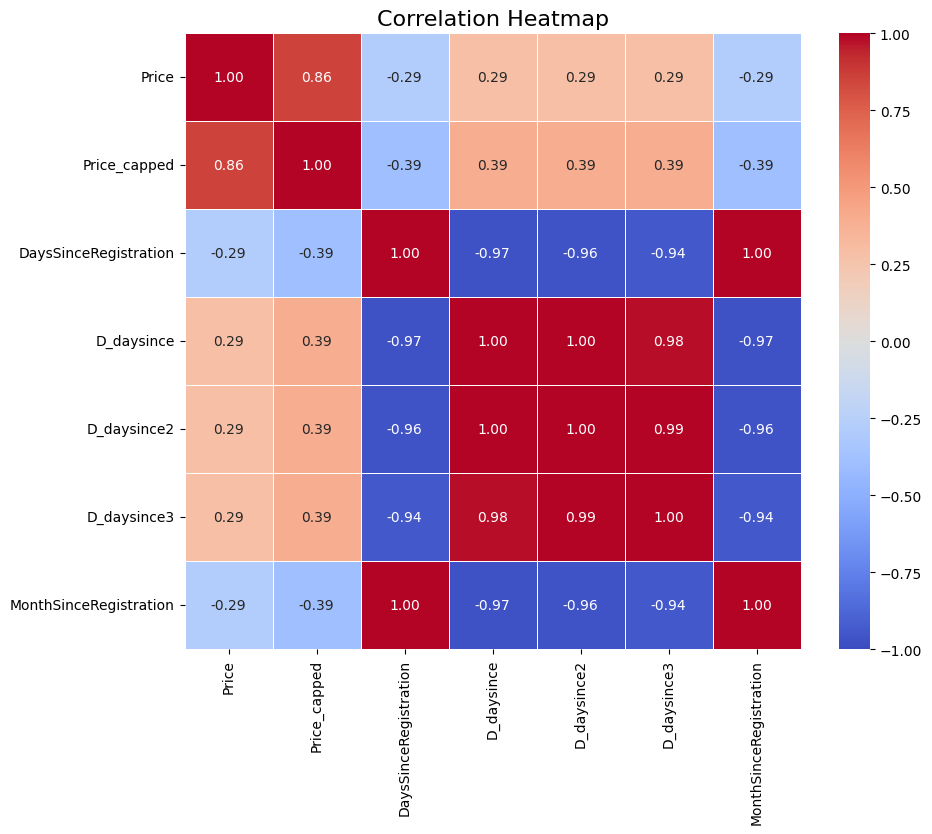

In [186]:
corr_matrix = df_encoded[['Price','Price_capped', 'DaysSinceRegistration','D_daysince','D_daysince2','D_daysince3','MonthSinceRegistration']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    square=True
)

plt.title("Correlation Heatmap", fontsize=16)

plt.show()

In [187]:
df_encoded = df_encoded.drop(['DaysSinceRegistration','D_daysince','D_daysince2','D_daysince3'], axis=1)

--------------------------------------------------------------------------------------------------------------------
#TRAIN & TEST

In [188]:
def result(y_pred, y_real):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_real, y_pred, alpha=0.7, color='blue', label='Predictions')
    plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs. Predicted Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

    mse = mean_squared_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)

#Main

In [189]:
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler

n=66
np.random.seed(n)
random.seed(n)

X = df_encoded.drop(['Price', 'Price_capped'], axis=1)
y = df_encoded['Price']
y2 = df_encoded['Price_capped']

# , 'DaysSinceRegistration'
continuous_features = ['Age', 'Meter', 'Average_per_meter', 'Population', 'Family Num', 'Density']

scaler = RobustScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

xgb_model = XGBRegressor( gpu_id=0, colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0,random_state=n)
xgb_model.fit(X, y)
y_pred_xgb = xgb_model.predict(X)

xgb_model2 = XGBRegressor( gpu_id=0, colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0,random_state=n)
xgb_model2.fit(X, y2)
y_pred_xgb2 = xgb_model2.predict(X)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:45] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:45] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:47] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:47] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


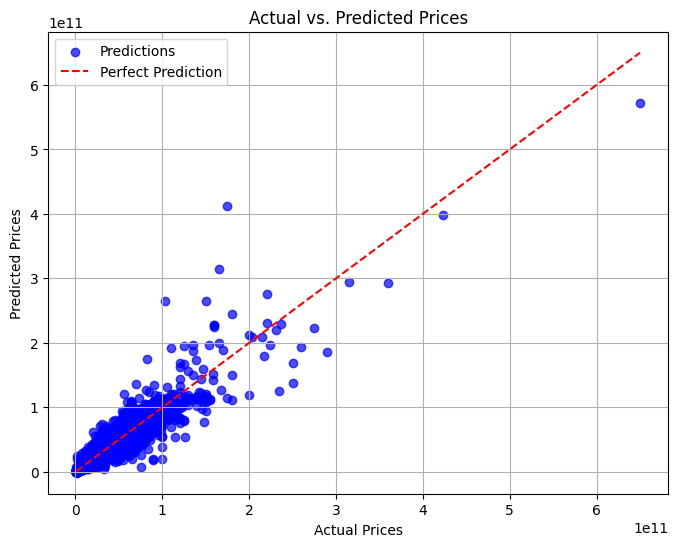

Mean Squared Error (MSE): 2.209882823146199e+19
R-squared (R2): 0.8974566104631254


In [190]:
X_second_layer = pd.DataFrame({
    'Meter': X['Meter'],
    'xgb_pred': y_pred_xgb
})

X_train, X_test, y_train, y_test = train_test_split(X_second_layer, y, test_size=0.2)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

result(y_pred_lr, y_test)

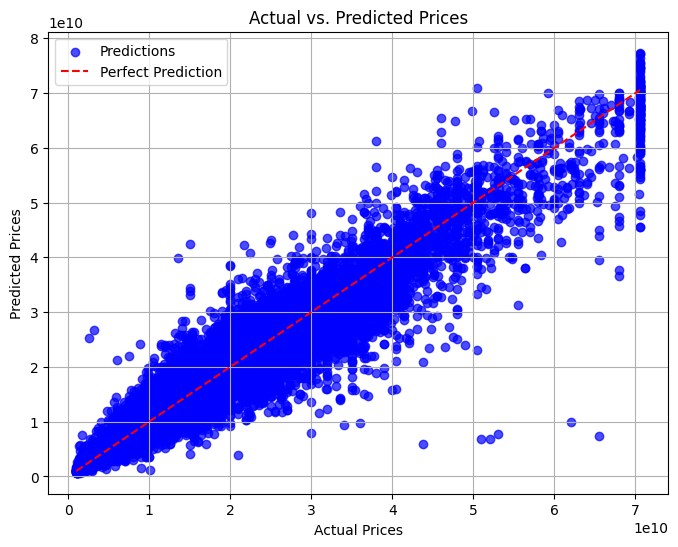

Mean Squared Error (MSE): 7.919294488042528e+18
R-squared (R2): 0.9306475562055037


In [191]:
X_second_layer2 = pd.DataFrame({
    'Meter': X['Meter'],
    'xgb_pred': y_pred_xgb2
})

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_second_layer2, y2, test_size=0.2)

lr_model2 = LinearRegression()
lr_model2.fit(X_train2, y_train2)

y_pred_lr2 = lr_model2.predict(X_test2)

result(y_pred_lr2, y_test2)

In [192]:
feature_importances2 = xgb_model2.feature_importances_
feature_names2 = X.columns

importance_df2 = pd.DataFrame({
    'Feature': feature_names2,
    'Importance': feature_importances2
}).sort_values(by='Importance', ascending=False)

print(importance_df2)

                   Feature   Importance
1                    Meter 0.4145160913
8   MonthSinceRegistration 0.2385806739
6                    Rooms 0.1206299514
9        Average_per_meter 0.0956208706
0                      Age 0.0665961131
12                 Density 0.0143528059
10              Population 0.0136793368
11              Family Num 0.0105961468
3                  Parking 0.0091038505
7                    Floor 0.0070640594
4                 Elevator 0.0066496800
2                     Loan 0.0013741663
5                WareHouse 0.0012362709


#Day since update nemishe XGB !!!!!!!!!!

In [ ]:
mahale = 'محمودیه'
per_meter = df_region[df_region['name'] == mahale]['Average_per_meter'].values[0]
pop = df_region[df_region['name'] == mahale]['Population'].values[0]
fn = df_region[df_region['name'] == mahale]['Family Num'].values[0]
den = df_region[df_region['name'] == mahale]['Density'].values[0]

print(f"per meter(region): {(per_meter/ 1_000_000):.2f} million Tomans")


input_data = {
'Age': [5],
'Meter': [248],
'DaysSinceRegistration': [1],
'Average_per_meter': [per_meter],
'Loan': [0],
'Parking': [1],
'Elevator': [1],
'WareHouse': [1],
'Rooms': [3],
'Floor': [7],
'Population': [pop],
'Family Num': [fn],
'Density': [den]
}

input_df = pd.DataFrame(input_data)

input_df[continuous_features] = scaler.transform(input_df[continuous_features])
input_df = input_df[X.columns]
print(input_df,'\n')

prediction = xgb_model2.predict(input_df)
prediction_billions = prediction[0] / 1_000_000_000
print(f"Predicted value1: {prediction_billions:.2f} billion Tomans")

X_tt = pd.DataFrame({
    'Meter': input_df['Meter'],
    'xgb_pred2': prediction
})
prediction2 = lr_model.predict(X_tt)
prediction_billions2 = prediction2[0] / 1_000_000_000
print(f"Predicted value2: {prediction_billions2:.2f} billion Tomans")

per meter(region): 234.63 million Tomans
        Age     Meter  Loan  Parking  Elevator  WareHouse  Rooms  Floor  \
0 -0.333333  2.129032     0        1         1          1      3      7   

   DaysSinceRegistration  Average_per_meter  Population  Family Num  Density  
0                 -1.385           1.700367         0.0         0.0    -0.25   

Predicted value1: 60.45 billion Tomans
Predicted value2: 60.80 billion Tomans


In [ ]:
df_region.sort_values(by='Average_per_meter')

,id,link,lat,long,name,district,Average_per_meter,Regions,Population,Family Num,Density
53,96,region-15-16-boroujerdi-town,35.640974,51.468227,شهرک بروجردی,15,34285714,15,659468,209141,24
317,387,region-4-omid-town,35.762184,51.532123,شهرک امید,4,35000000,4,917261,303730,15
17,53,region-19-20-shahid-kazemi,35.617828,51.355847,شهید کاظمی,19,36363636,19,255533,77764,13
82,131,region-13-14-jaberi,35.684460,51.453685,جابری,14,38571428,14,489101,163924,34
73,120,region-15-16-bagh-azari,35.652293,51.422392,باغ آذری,16,38571428,16,267678,87464,16
...,...,...,...,...,...,...,...,...,...,...,...
3,4,region-1-zafaraniyeh,35.807681,51.416379,زعفرانیه,1,242423890,1,493889,169259,11
5,6,region-1-valiasr-ferdows-garden,35.806215,51.423567,ولیعصر-باغ فردوس,1,252427218,1,493889,169259,11
384,459,region-1-velenjak,35.806665,51.401393,ولنجک,1,253930471,1,493889,169259,11
379,454,region-1-elahiyeh,35.789861,51.426202,الهیه,1,258503518,1,493889,169259,11


In [ ]:
df.sort_values(by='Price_capped')

,Age,Price,Meter,Loan,Parking,Elevator,WareHouse,Rooms,Floor,DaysSinceRegistration,per_meter,Average_per_meter,Population,Family Num,Density,Price_capped_95,Price_avg,Price_capped
25411,10.0,1.400000e+09,53.0,0.0,1.0,1.0,1.0,1.0,4.0,340.0,26415094.0,175979603,493889,169259,11,1.400000e+09,1.400000e+09,1400000000
58153,1.0,1.550000e+09,60.0,1.0,1.0,0.0,0.0,1.0,1.0,429.0,25833333.0,144785488,250753,84896,12,1.550000e+09,1.550000e+09,1550000000
13679,26.0,1.650000e+09,37.0,0.0,0.0,0.0,1.0,1.0,1.0,426.0,44594594.0,88305675,425044,148535,32,1.650000e+09,1.650000e+09,1650000000
21101,12.0,1.680000e+09,40.0,0.0,0.0,0.0,1.0,1.0,1.0,225.0,42000000.0,59736437,917261,303730,15,1.680000e+09,1.680000e+09,1680000000
40841,23.0,1.690000e+09,55.0,0.0,0.0,0.0,1.0,1.0,1.0,88.0,30727272.0,59736437,917261,303730,15,1.690000e+09,1.690000e+09,1690000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,12.0,1.400000e+11,584.0,0.0,1.0,1.0,1.0,5.0,5.0,420.0,239726027.0,242423890,493889,169259,11,4.800000e+10,9.400000e+10,90000000000
38576,0.0,4.350000e+11,610.0,0.0,1.0,1.0,1.0,5.0,11.0,393.0,713114754.0,242423890,493889,169259,11,4.800000e+10,2.415000e+11,90000000000
55597,3.0,1.533000e+11,365.0,0.0,1.0,1.0,1.0,4.0,4.0,103.0,420000000.0,258503518,493889,169259,11,4.800000e+10,1.006500e+11,90000000000
26741,0.0,2.240000e+11,400.0,0.0,1.0,1.0,1.0,4.0,5.0,103.0,560000000.0,258503518,493889,169259,11,4.800000e+10,1.360000e+11,90000000000


In [195]:
import gradio as gr
import pandas as pd

def predict_price(Age, Meter, date, region, Loan, Parking, Elevator, WareHouse, Rooms, Floor):
    per_meter = df_region[df_region['name'] == region]['Average_per_meter'].values[0]
    pop = df_region[df_region['name'] == region]['Population'].values[0]
    f_n = df_region[df_region['name'] == region]['Family Num'].values[0]
    den = df_region[df_region['name'] == region]['Density'].values[0]

    Parking = 1 if Parking == "Yes" else 0
    Elevator = 1 if Elevator == "Yes" else 0
    Loan = 1 if Loan == "Yes" else 0
    WareHouse = 1 if WareHouse == "Yes" else 0

    input_data = {
        'Age': [Age],
        'Meter': [Meter],
        'MonthSinceRegistration': [date],
        'Average_per_meter': [per_meter],
        'Loan': [Loan],
        'Parking': [Parking],
        'Elevator': [Elevator],
        'WareHouse': [WareHouse],
        'Rooms': [Rooms],
        'Floor': [Floor],
        'Population': [pop],
        'Family Num': [f_n],
        'Density': [den]
    }

    input_df = pd.DataFrame(input_data)
    input_df[continuous_features] = scaler.transform(input_df[continuous_features])
    input_df = input_df[X.columns]

    pred = xgb_model.predict(input_df)
    X_se = pd.DataFrame({
    'Meter': input_df['Meter'],
    'xgb_pred': pred
    })
    prediction = lr_model.predict(X_se)
    prediction_billions = prediction[0] / 1_000_000_000
    diff = prediction_billions * 0.06 + 0.4
    range = f"بین {(prediction_billions - diff):.2f} و {(prediction_billions + diff):.2f} میلیارد تومان"


    pred2 = xgb_model2.predict(input_df)
    X_se2 = pd.DataFrame({
    'Meter': input_df['Meter'],
    'xgb_pred': pred2
    })
    prediction2 = lr_model2.predict(X_se2)
    prediction_billions2 = prediction2[0] / 1_000_000_000
    diff2 = prediction_billions2 * 0.06 + 0.4
    range2 = f"بین {(prediction_billions2 - diff2):.2f} و {(prediction_billions2 + diff2):.2f} میلیارد تومان"

    return range, range2

inputs = [
    gr.Number(label="سن بنا"),
    gr.Number(label="متراژ"),
    gr.Number(label="validDate"),
    gr.Dropdown(choices=df_region['name'].tolist(), label="منطقه"),
    gr.Radio(choices=["دارد", "ندارد"], label="وام"),
    gr.Radio(choices=["دارد", "ندارد"], label="پارکینگ"),
    gr.Radio(choices=["دارد", "ندارد"], label="آسانسور"),
    gr.Radio(choices=["دارد", "ندارد"], label="انباری"),
    gr.Number(label="تعداد اتاق"),
    gr.Number(label="طبقه")
]

interface = gr.Interface(
    fn=predict_price,
    inputs=inputs,
    outputs=[
        gr.Label(label="پیش‌بینی اول:"),
        gr.Label(label="پیش‌بینی دوم:")
    ],
    title="پیش بینی قیمت ملک",
    description=".اطلاعات ملک را جهت پیش‌بینی قیمت وارد کنید",
    allow_flagging="never",
    theme="dark"
)

interface.launch()

/usr/local/lib/python3.11/dist-packages/gradio/blocks.py:1102: UserWarning: Cannot load dark. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/dark (Request ID: Root=1-67d6c0b0-0ea0abfc66071fd6146eaa46;99469fc9-46e4-4345-9de1-ada58eaea32e)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")
/usr/local/lib/python3.11/dist-packages/gradio/interface.py:403: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://29693181c17a1dd17b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


----------------------------------------------------------------endddddddddddddddddddd